# Global Air Quality Dataset Analysis
## About the Dataset
The Global Air Quality Data dataset provides an extensive compilation of air quality measurements from various prominent cities worldwide. This dataset includes crucial environmental indicators such as particulate matter (PM2.5 and PM10), nitrogen dioxide (NO2), sulfur dioxide (SO2), carbon monoxide (CO), and ozone (O3), along with meteorological data like temperature, humidity, and wind speed. With 10,000 records.
The dataset is composed of the following columns:

`City`: The name of the city where the air quality measurement was taken. \
`Country`: The country in which the city is located. \
`Date`: The date when the measurement was recorded. \
`PM2.5`: The concentration of fine particulate matter with a diameter of less than 2.5 micrometers (µg/m³). \
`PM10`: The concentration of particulate matter with a diameter of less than 10 micrometers (µg/m³). \
`NO2`: The concentration of nitrogen dioxide (µg/m³). \
`SO2`: The concentration of sulfur dioxide (µg/m³). \
`CO`: The concentration of carbon monoxide (mg/m³). \
`O3`: The concentration of ozone (µg/m³). \
`Temperature`: The temperature at the time of measurement (°C). \
`Humidity`: The humidity level at the time of measurement (%). \
`Wind Speed`: The wind speed at the time of measurement (m/s).

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [3]:
# Importing the dataset
df = pd.read_csv('global_air_quality_data_10000.csv')
df.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
warnings.filterwarnings('ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


# Preprocessing

In [6]:
df.isna().sum() / len(df)

City           0.0
Country        0.0
Date           0.0
PM2.5          0.0
PM10           0.0
NO2            0.0
SO2            0.0
CO             0.0
O3             0.0
Temperature    0.0
Humidity       0.0
Wind Speed     0.0
dtype: float64

<Axes: >

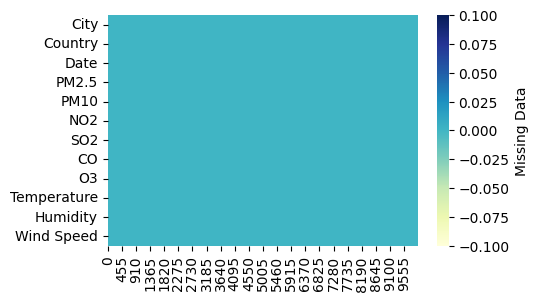

In [7]:
# Visualizing Missing Data using a seaborn heatmap.
plt.figure(figsize=(5,3))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

## Exploratory Data Analysis

**Outlier Detection & Removal**

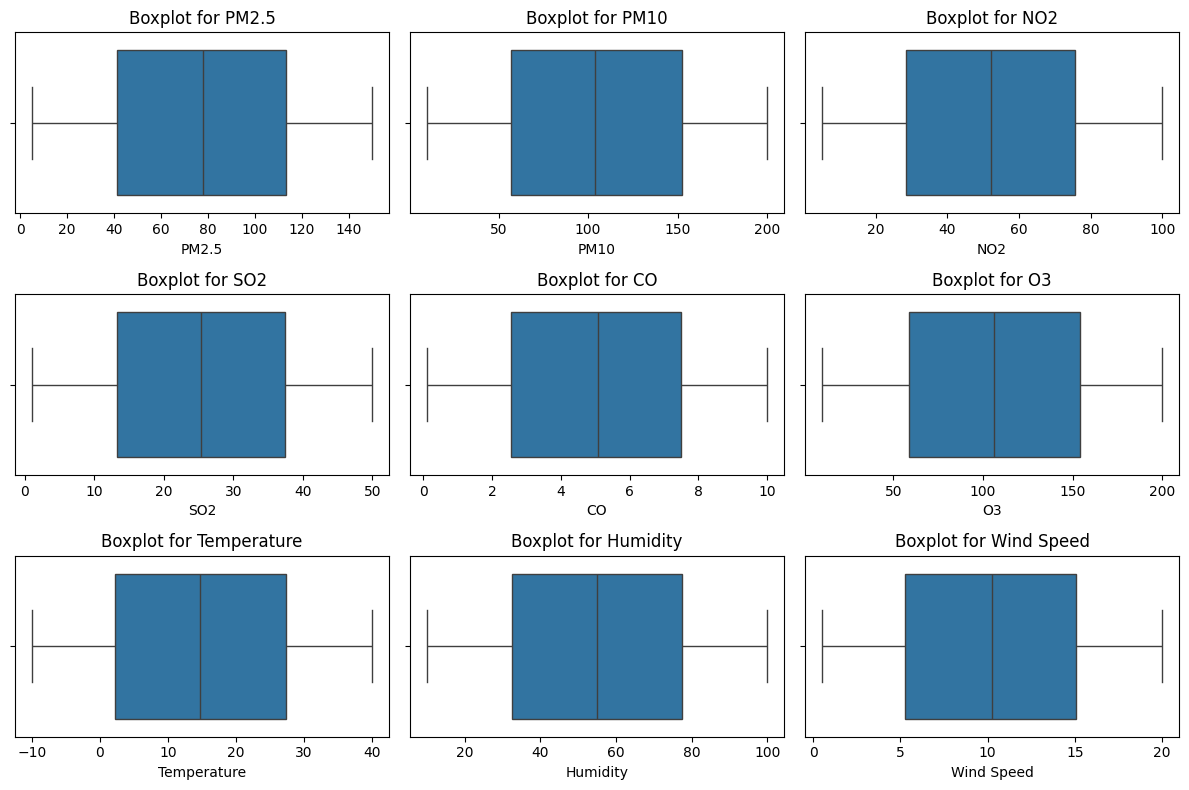

In [8]:
# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# List of features to plot
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']

# Create boxplots for each feature
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)  # Arrange boxplots in a 3x3 grid
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot for {feature}')
    plt.xlabel(feature)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [9]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


# Time Series Analysis

In [10]:
# Convert 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# Create a copy and set 'Date' as index
df_copy = df.copy()
df_copy.set_index('Date', inplace=True)

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2023-03-19 to 2023-06-13
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   PM2.5        10000 non-null  float64
 3   PM10         10000 non-null  float64
 4   NO2          10000 non-null  float64
 5   SO2          10000 non-null  float64
 6   CO           10000 non-null  float64
 7   O3           10000 non-null  float64
 8   Temperature  10000 non-null  float64
 9   Humidity     10000 non-null  float64
 10  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(2)
memory usage: 937.5+ KB


**Data over a period of 5 Days**

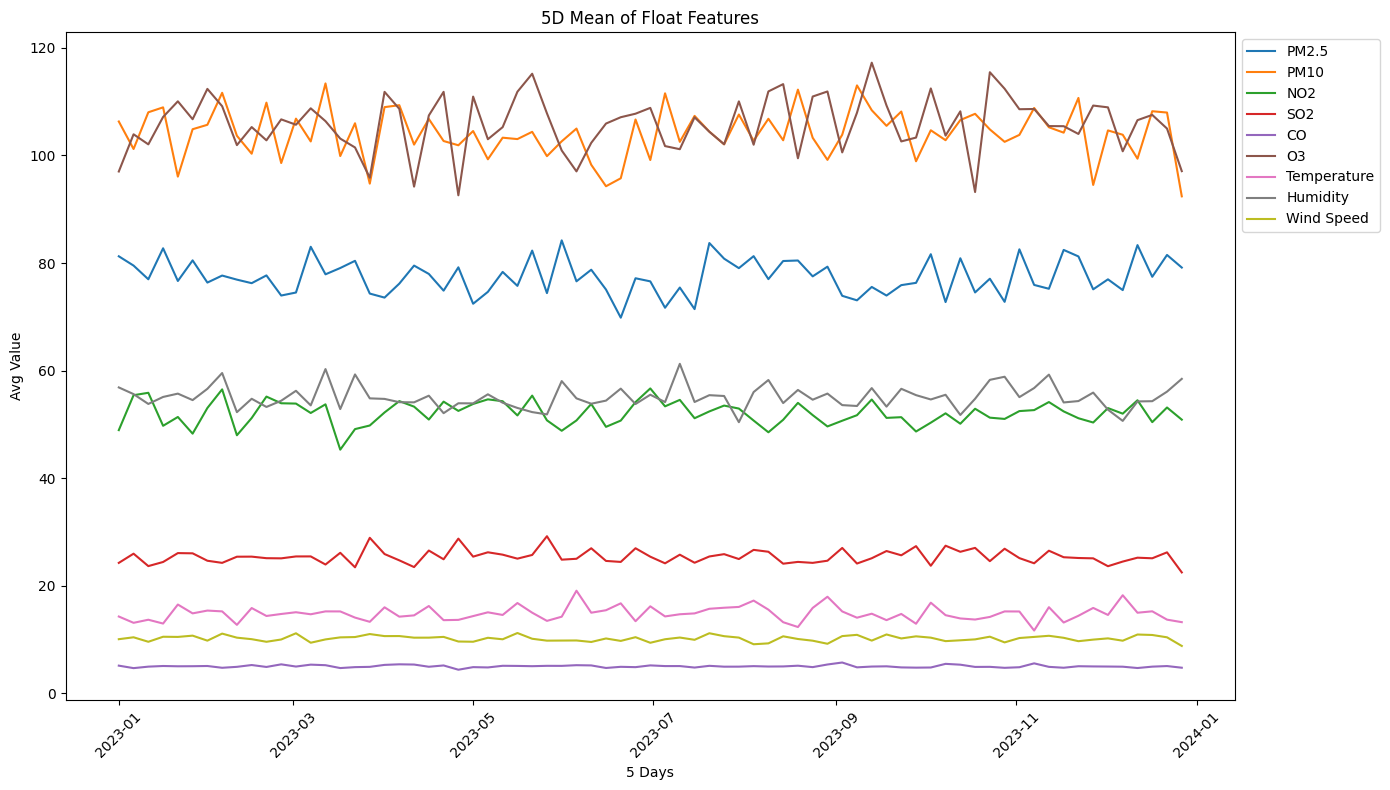

In [13]:
# Select only float-type columns
df_copy_float = df_copy.select_dtypes(include='float')

# Resample
days_df = df_copy_float.resample('5D').mean()

# Plot
plt.figure(figsize=(14, 8))
for column in days_df.columns:
    plt.plot(days_df.index, days_df[column], label=column)

# Customize the plot
plt.title('5D Mean of Float Features')
plt.xlabel('5 Days')
plt.ylabel('Avg Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


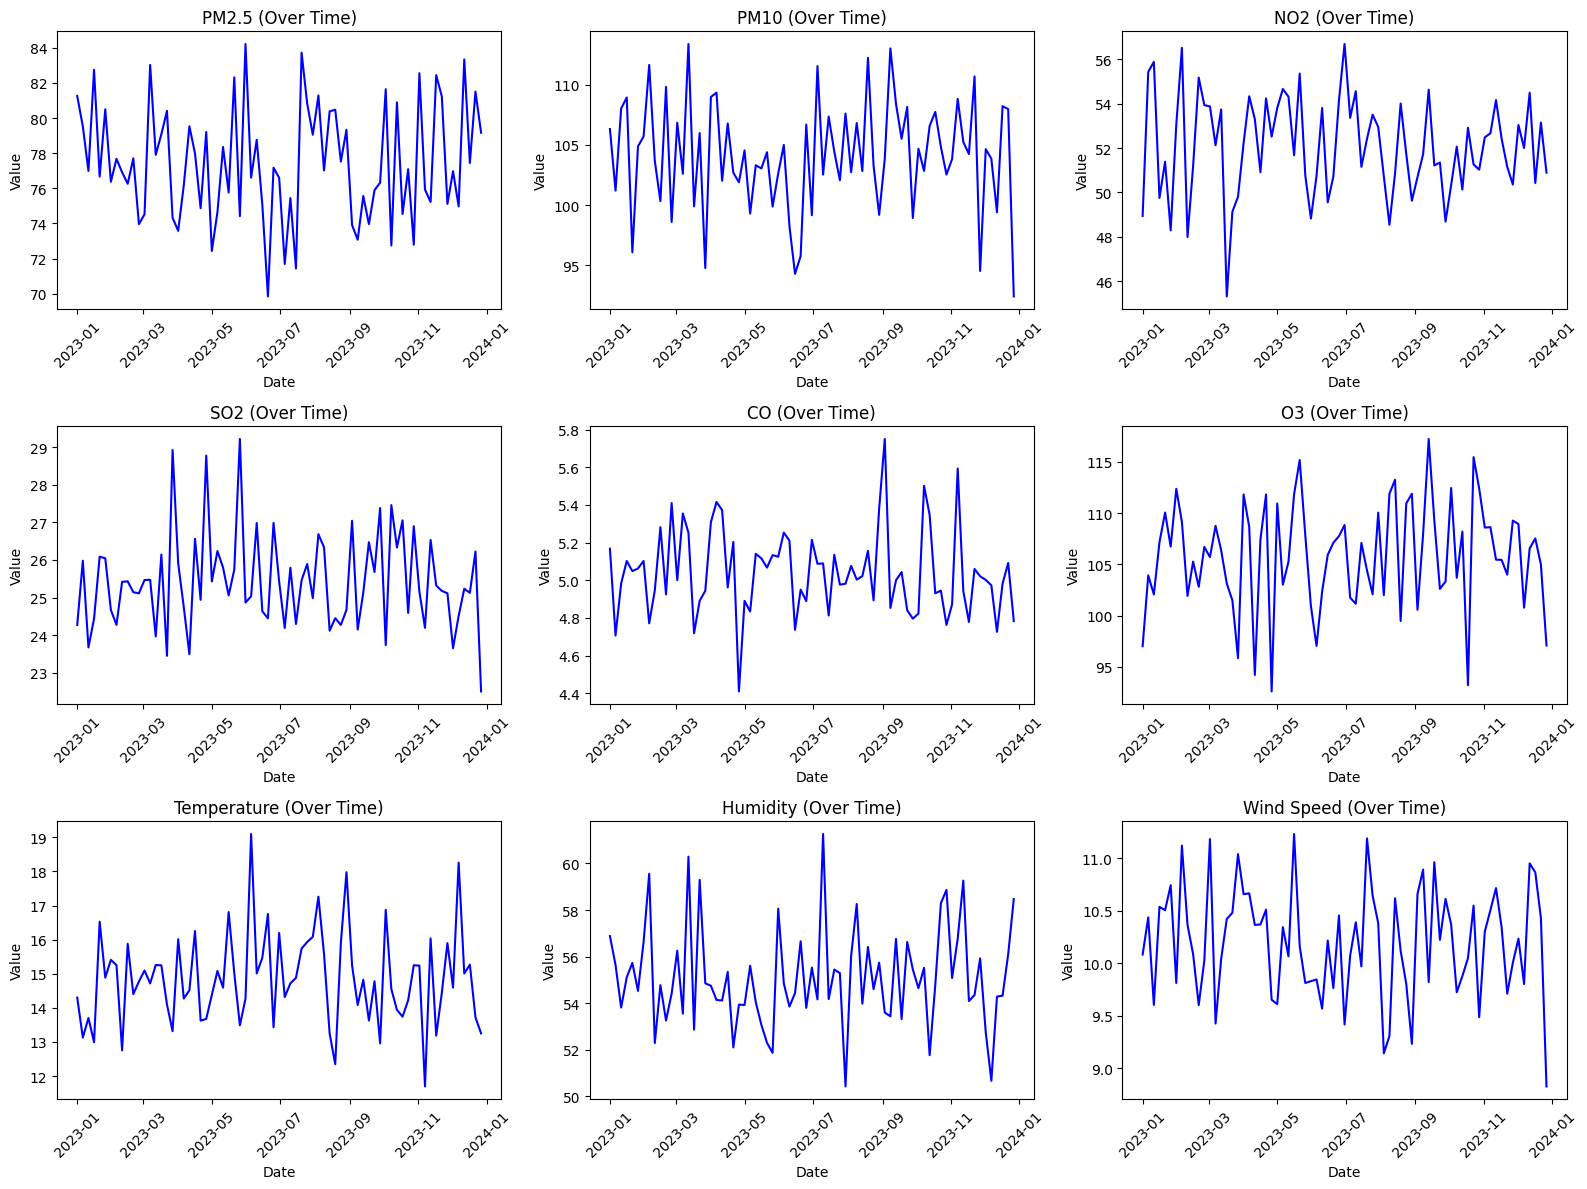

In [14]:
# Number of features
num_features = len(days_df.columns)

# Create subplots: adjust rows and cols as needed
plt.figure(figsize=(16, 4 * ((num_features + 2) // 3)))
for i, column in enumerate(days_df.columns):
    plt.subplot((num_features + 2) // 3, 3, i + 1)  # Auto-grid
    plt.plot(days_df.index, days_df[column], color='b')
    plt.title(f'{column} (Over Time)')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# Finding AQI

In [15]:
# Sort the DataFrame by 'Date' column in ascending order
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' column is in datetime format
df_sorted = df.sort_values(by='Date', ascending=True)

# Display the sorted DataFrame
print(df_sorted)

                City      Country       Date   PM2.5    PM10    NO2    SO2  \
5948         Bangkok     Thailand 2023-01-01  146.15   17.85   8.16  26.30   
7722  Rio de Janeiro       Brazil 2023-01-01   52.43   76.80  46.99  13.02   
7276           Cairo        Egypt 2023-01-01  115.16   73.60  53.68  23.44   
9756        Istanbul       Turkey 2023-01-01   86.32  177.30  80.24  30.32   
9788  Rio de Janeiro       Brazil 2023-01-01   10.24  118.73  51.87  39.72   
...              ...          ...        ...     ...     ...    ...    ...   
4119         Beijing        China 2023-12-28   65.78   32.82  60.07  34.81   
3581          Berlin      Germany 2023-12-28  118.27  195.53  84.32   5.25   
6274           Seoul  South Korea 2023-12-28   26.77   52.08  48.29  13.14   
3207           Paris       France 2023-12-28  122.20   95.50  58.98  24.59   
4082           Paris       France 2023-12-28   90.30   40.79  34.19  17.49   

        CO      O3  Temperature  Humidity  Wind Speed  
5948  6

In [16]:
columns_to_drop = ['City','Country','NO2','SO2','O3','Wind Speed']

#Drop the columns
df_1 = df.drop(columns=columns_to_drop)
print(df_1.head())

        Date   PM2.5    PM10    CO  Temperature  Humidity
0 2023-03-19   86.57   25.19  4.46        17.67     59.35
1 2023-02-16   50.63   97.39  3.40         3.46     67.51
2 2023-11-13  130.21   57.22  0.12        25.29     29.30
3 2023-03-16  119.70  130.52  7.74        23.15     99.97
4 2023-04-04   55.20   36.62  2.00        16.02     90.28


**AQI_Function**

In [17]:
def calc_aqi_us(concentration, pollutant):
    if pollutant == 'PM2.5':
        c_low = [0, 12.1, 35.5, 55.5, 150.5, 250.5, 350.5, 500.5]
        c_high = [12, 35.4, 55.4, 150.4, 250.4, 350.4, 500.4, 1000.0]
        i_low = [0, 51, 101, 151, 201, 301, 401, 501]
        i_high = [50, 100, 150, 200, 300, 400, 500, 9999]
    elif pollutant == 'PM10':
        c_low = [0, 55, 155, 255, 355, 425, 505, 605]
        c_high = [54, 154, 254, 354, 424, 504, 604, 999.0]
        i_low = [0, 51, 101, 151, 201, 301, 401, 501]
        i_high = [50, 100, 150, 200, 300, 400, 500, 9999]
    elif pollutant == 'CO':
        c_low = [0, 4.5, 9.5, 12.5, 15.5, 30.5, 40.5]
        c_high = [4.4, 9.4, 12.4, 15.4, 30.4, 40.4, 50.4]
        i_low = [0, 51, 101, 151, 201, 301, 401]
        i_high = [50, 100, 150, 200, 300, 400, 500]
    else:
        return 'Invalid pollutant type'

    c = float(concentration)

    # Find the correct bracket
    for i in range(len(c_low)):
        if c_low[i] <= c <= c_high[i]:
            aqi = ((i_high[i] - i_low[i]) / (c_high[i] - c_low[i])) * (c - c_low[i]) + i_low[i]
            return round(aqi, 1)

    # Handle values above the highest breakpoint
    if c > c_high[-1]:
        # Use the last bracket's formula
        aqi = ((i_high[-1] - i_low[-1]) / (c_high[-1] - c_low[-1])) * (c - c_low[-1]) + i_low[-1]
        return round(aqi, 1)

    # Values below the lowest breakpoint (return 0 is technically correct)
    return 0

**Preparing Dataset for Model Training**

In [18]:
df_2 = df_1.copy()

# Calculate AQI for each pollutant and add new columns. Important for final AQI calculation
# uses the "calc_aqi_us" function
df_2['PM2.5_AQI'] = df_2['PM2.5'].apply(lambda x: calc_aqi_us(x, 'PM2.5'))
df_2['PM10_AQI'] = df_2['PM10'].apply(lambda x: calc_aqi_us(x, 'PM10'))
df_2['CO_AQI'] = df_2['CO'].apply(lambda x: calc_aqi_us(x, 'CO'))

# Calculate the final AQI for each row
df_2['AQI'] = df_2[['PM2.5_AQI', 'PM10_AQI', 'CO_AQI']].max(axis=1)

# Display the updated DataFrame with AQI columns
df_2.head()

,Date,PM2.5,PM10,CO,Temperature,Humidity,PM2.5_AQI,PM10_AQI,CO_AQI,AQI
0,2023-03-19,86.57,25.19,4.46,17.67,59.35,167.0,23.3,0.0,167.0
1,2023-02-16,50.63,97.39,3.40,3.46,67.51,138.3,72.0,38.6,138.3
2,2023-11-13,130.21,57.22,0.12,25.29,29.30,189.6,52.1,1.4,189.6
3,2023-03-16,119.70,130.52,7.74,23.15,99.97,184.1,88.4,83.4,184.1
4,2023-04-04,55.20,36.62,2.00,16.02,90.28,149.5,33.9,22.7,149.5


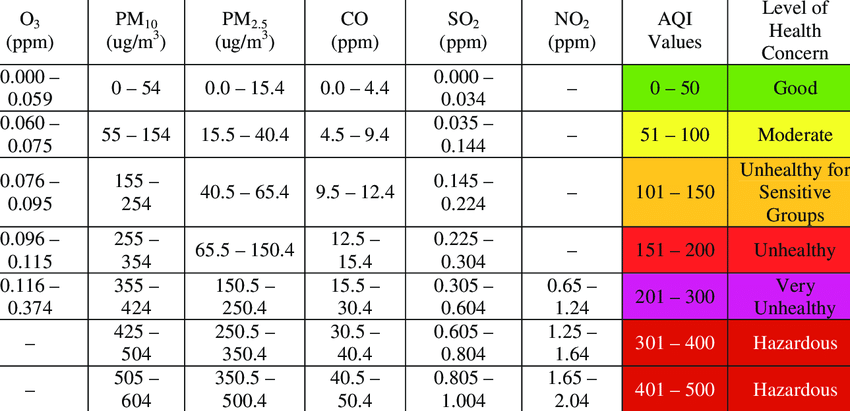

In [19]:
# Updated categorization function - according to EPA standard mentioned above
def categorize_aqi(aqi):
    if pd.isna(aqi) or aqi < 0:  # Handle NaN or negative values
        return 'Invalid AQI'
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:  # AQI > 300
        return 'Hazardous'

In [20]:
# Apply the function to the 'Final_AQI' column and create a new column 'AQI Category'
df_2['AQI Category'] = df_2['AQI'].apply(categorize_aqi)

# Display the updated DataFrame with AQI and categories
df_2.head()

,Date,PM2.5,PM10,CO,Temperature,Humidity,PM2.5_AQI,PM10_AQI,CO_AQI,AQI,AQI Category
0,2023-03-19,86.57,25.19,4.46,17.67,59.35,167.0,23.3,0.0,167.0,Unhealthy
1,2023-02-16,50.63,97.39,3.40,3.46,67.51,138.3,72.0,38.6,138.3,Unhealthy for Sensitive Groups
2,2023-11-13,130.21,57.22,0.12,25.29,29.30,189.6,52.1,1.4,189.6,Unhealthy
3,2023-03-16,119.70,130.52,7.74,23.15,99.97,184.1,88.4,83.4,184.1,Unhealthy
4,2023-04-04,55.20,36.62,2.00,16.02,90.28,149.5,33.9,22.7,149.5,Unhealthy for Sensitive Groups


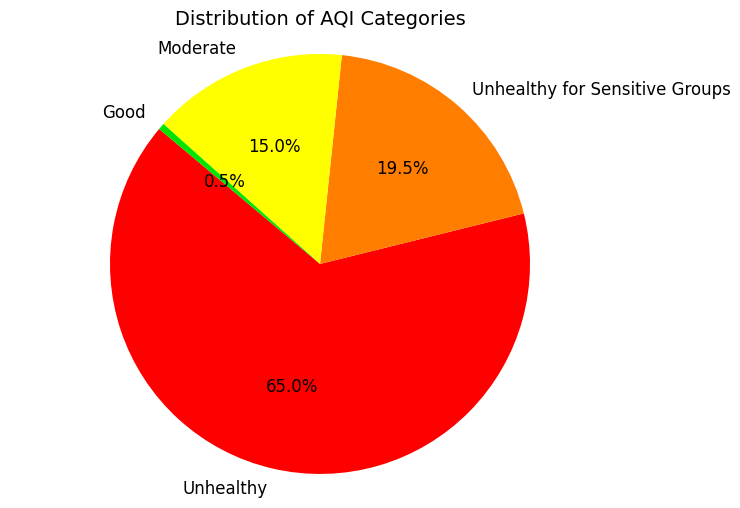

In [21]:
category_counts = df_2['AQI Category'].value_counts()

# Define clear AQI-like colors (Good → Hazardous)
aqi_colors = {
    'Good': '#00e400',               # Green
    'Moderate': '#ffff00',           # Yellow
    'Unhealthy for Sensitive Groups': '#ff7e00',  # Orange
    'Unhealthy': '#ff0000',          # Red
    'Very Unhealthy': '#8f3f97',     # Purple
    'Hazardous': '#7e0023'           # Maroon
}

# Match colors to the categories in correct order
colors = [aqi_colors[cat] for cat in category_counts.index]

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title('Distribution of AQI Categories', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

In [22]:
df_2.isna().sum() / len(df_2)
df_2 = df_2.drop_duplicates().reset_index(drop=True)

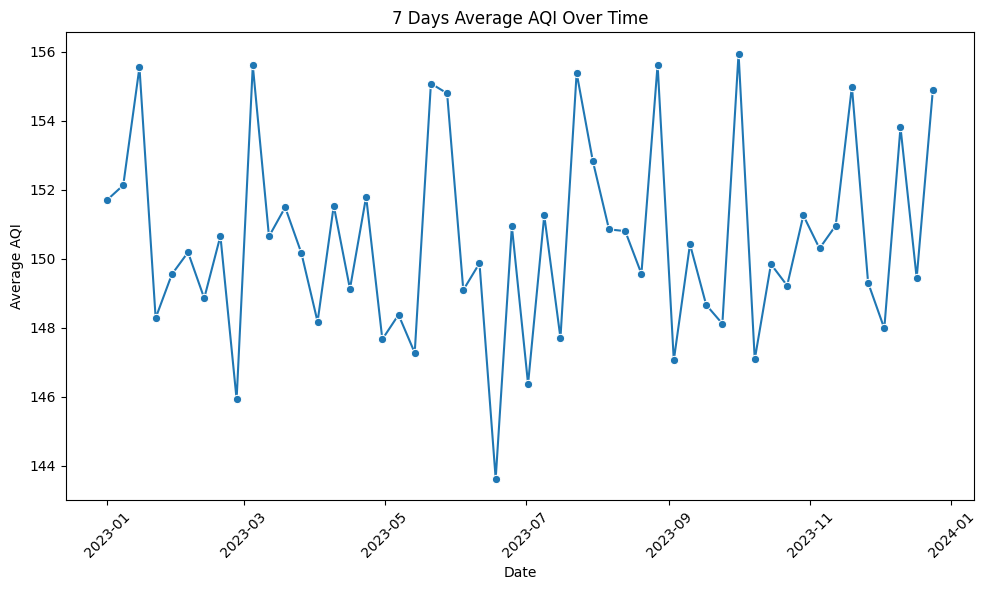

In [23]:
# Ensure 'Date' is datetime
df_2['Date'] = pd.to_datetime(df_2['Date'])

# Create a copy with 'Date' as index
df_aqi = df_2.copy()
df_aqi.set_index('Date', inplace=True)

# Aggregate AQI by 10 Days
weekly_aqi = df_aqi['AQI'].resample('7D').mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='AQI', data=weekly_aqi, marker='o')

# Customize the plot
plt.title('7 Days Average AQI Over Time')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

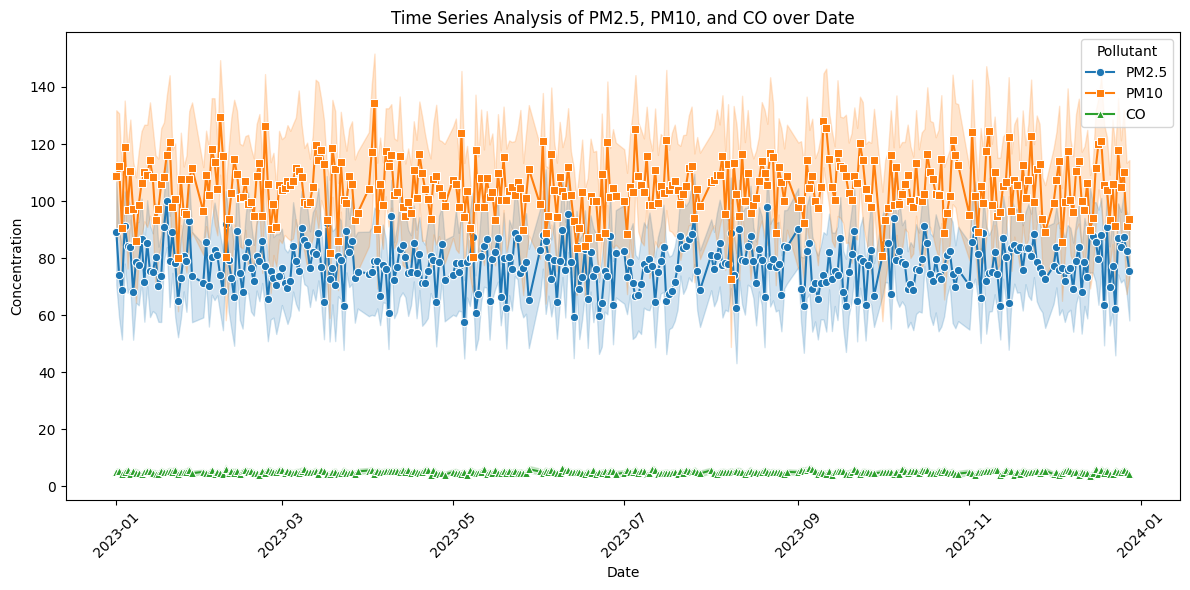

In [24]:
plt.figure(figsize=(12, 6))

# Plot each pollutant as a separate line
sns.lineplot(x='Date', y='PM2.5', data=df, marker='o', label='PM2.5')
sns.lineplot(x='Date', y='PM10', data=df, marker='s', label='PM10')
sns.lineplot(x='Date', y='CO', data=df, marker='^', label='CO')

# Labels and title
plt.title('Time Series Analysis of PM2.5, PM10, and CO over Date')
plt.xlabel('Date')
plt.ylabel('Concentration')

# Rotate x-axis labels and add legend
plt.xticks(rotation=45)
plt.legend(title='Pollutant')
plt.tight_layout()
plt.show()


# Model Training - Linear Regression

**Linear Regression without SMOTE**

In [25]:
df_2.head()

,Date,PM2.5,PM10,CO,Temperature,Humidity,PM2.5_AQI,PM10_AQI,CO_AQI,AQI,AQI Category
0,2023-03-19,86.57,25.19,4.46,17.67,59.35,167.0,23.3,0.0,167.0,Unhealthy
1,2023-02-16,50.63,97.39,3.40,3.46,67.51,138.3,72.0,38.6,138.3,Unhealthy for Sensitive Groups
2,2023-11-13,130.21,57.22,0.12,25.29,29.30,189.6,52.1,1.4,189.6,Unhealthy
3,2023-03-16,119.70,130.52,7.74,23.15,99.97,184.1,88.4,83.4,184.1,Unhealthy
4,2023-04-04,55.20,36.62,2.00,16.02,90.28,149.5,33.9,22.7,149.5,Unhealthy for Sensitive Groups


In [26]:
#Preparing for Linear Regression
df_LR = df_2.copy()
df_LR = df_LR.drop(['PM2.5_AQI', 'PM10_AQI', 'CO_AQI','AQI Category'], axis=1)
X = df_LR[['PM2.5', 'PM10', 'CO', 'Temperature', 'Humidity']]
y = df_LR['AQI']

# Mean normalization

X_norm = X.copy()
for col in X.columns:
    col_min = X[col].min()
    col_max = X[col].max()
    col_mean = X[col].mean()
    X_norm[col] = (X[col] - col_mean) / (col_max - col_min)

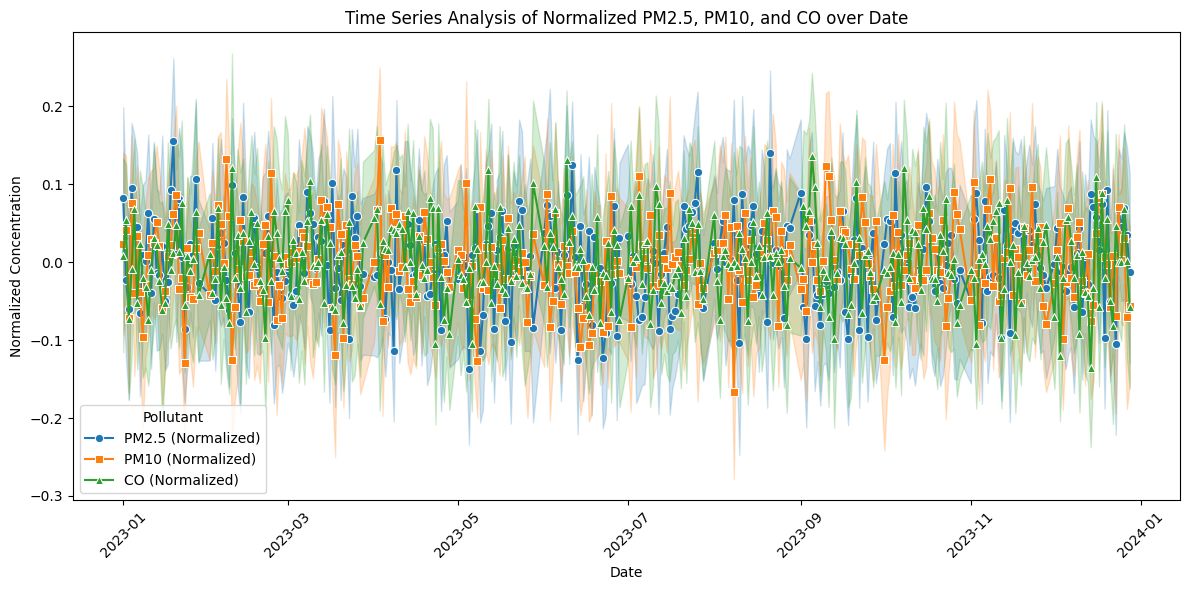

In [27]:
# Add Date column to normalized DataFrame for plotting
X_norm['Date'] = df_LR['Date']

plt.figure(figsize=(12, 6))

# Plot normalized pollutants
sns.lineplot(x='Date', y='PM2.5', data=X_norm, marker='o', label='PM2.5 (Normalized)')
sns.lineplot(x='Date', y='PM10', data=X_norm, marker='s', label='PM10 (Normalized)')
sns.lineplot(x='Date', y='CO', data=X_norm, marker='^', label='CO (Normalized)')

# Labels and title
plt.title('Time Series Analysis of Normalized PM2.5, PM10, and CO over Date')
plt.xlabel('Date')
plt.ylabel('Normalized Concentration')

plt.xticks(rotation=45)
plt.legend(title='Pollutant')
plt.tight_layout()
plt.show()

In [28]:
X_norm

,PM2.5,PM10,CO,Temperature,Humidity,Date
0,0.062925,-0.417096,-0.059392,0.055457,0.047471,2023-03-19
1,-0.185006,-0.037096,-0.166463,-0.228743,0.138158,2023-02-16
2,0.363973,-0.248517,-0.497776,0.207857,-0.286492,2023-11-13
3,0.291470,0.137273,0.271921,0.165057,0.498904,2023-03-16
4,-0.153480,-0.356938,-0.307877,0.022457,0.391214,2023-04-04
...,...,...,...,...,...,...
9995,0.485662,0.420536,-0.226059,-0.336343,0.112708,2023-09-16
9996,-0.449975,0.089747,-0.297776,-0.494143,-0.476979,2023-12-05
9997,-0.230260,0.206220,-0.440200,0.489057,-0.012543,2023-11-26
9998,-0.069112,-0.040253,0.097173,0.226257,0.038469,2023-02-03


In [29]:

def linear_regression_wo_smote(X_norm):
    # Move AQI column to y_AQI for Linear Regression (target variable)
    y_AQI = y # Target variable for linear regression (AQI) - continuous variable

    X_norm = X_norm.drop('Date', axis=1)

    # Step 4: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_AQI, test_size=0.2, random_state=42)

    # Step 5: Apply Linear Regression with AQI as the target variable
    linear_reg_model = LinearRegression()

    # Train the model
    linear_reg_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = linear_reg_model.predict(X_test)

    # Step 6: Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2


In [30]:
mse, r2 = linear_regression_wo_smote(X_norm)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 156.22257073892965
R^2 Score: 0.8934064566723228


**Upsample**

In [31]:
# With Smotes Create a copy of the dataset
df_smote_LR = df_2.copy()
df_LR2 = df_smote_LR.drop(['PM2.5_AQI', 'PM10_AQI', 'CO_AQI'], axis=1)
X = df_LR2[['PM2.5', 'PM10', 'CO', 'Temperature', 'Humidity','AQI']]
y = df_LR2['AQI Category']

# Mean normalization
X_norm = X.copy()
for col in X.columns:
    col_min = X[col].min()
    col_max = X[col].max()
    col_mean = X[col].mean()
    X_norm[col] = (X[col] - col_mean) / (col_max - col_min)

# Step 2: Apply SMOTE to balance the AQI category
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_category_res = smote.fit_resample(X, y)

# Check the balance of the new resampled dataset for AQI category
print("Before SMOTE:")
print(y.value_counts())  # Check original class distribution
print("\nAfter SMOTE:")
print(y_category_res.value_counts())  # Check new class distribution after SMOTE

Before SMOTE:
AQI Category
Unhealthy                         6498
Unhealthy for Sensitive Groups    1947
Moderate                          1505
Good                                50
Name: count, dtype: int64

After SMOTE:
AQI Category
Unhealthy                         6498
Unhealthy for Sensitive Groups    6498
Moderate                          6498
Good                              6498
Name: count, dtype: int64


In [32]:
# def linear_regression_with_smote(X_res):
#   # Step 3: Move AQI column to y_AQI for Linear Regression (target variable)
#   y_AQI = X_res['AQI']  # Target variable for linear regression (AQI) - continuous variable

#   # Drop the AQI column from X_res as it should only be the features
#   X_res = X_res.drop('AQI', axis=1)

#   # Step 4: Split the data into training and testing sets
#   X_train, X_test, y_train, y_test = train_test_split(X_res, y_AQI, test_size=0.2, random_state=42)

#    # Step 5: Apply Linear Regression with AQI as the target variable
#   linear_reg_model = LinearRegression()

#   # Train the model
#   linear_reg_model.fit(X_train, y_train)

#   # Predict on the test data
#   y_pred = linear_reg_model.predict(X_test)

#   # Step 6: Evaluate the model
#   mse = mean_squared_error(y_test, y_pred)
#   r2 = r2_score(y_test, y_pred)
#   return mse, r2, y_test, y_pred, linear_reg_model

# mse, r2, y_test, y_pred, linear_reg_model = linear_regression_with_smote(X_norm)
# print("Mean Squared Error:", mse)
# print("R^2 Score:", r2)

In [33]:

# Step 3: Move AQI column to y_AQI for Linear Regression (target variable)
y_AQI = X_res['AQI']  # Target variable for linear regression (AQI) - continuous variable

# Drop the AQI column from X_res as it should only be the features
X_res = X_res.drop('AQI', axis=1)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_AQI, test_size=0.2, random_state=42)

  # Step 5: Apply Linear Regression with AQI as the target variable
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_reg_model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 264.28302947372515
R^2 Score: 0.8986750315616644


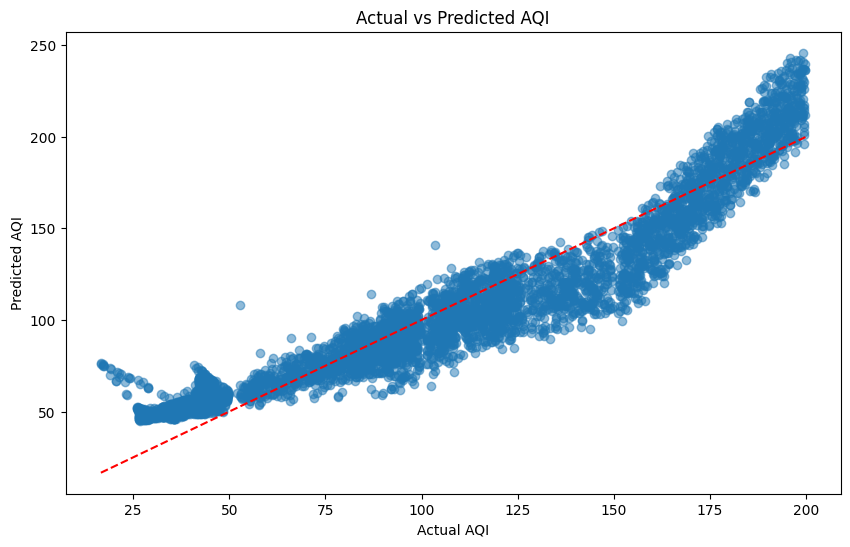

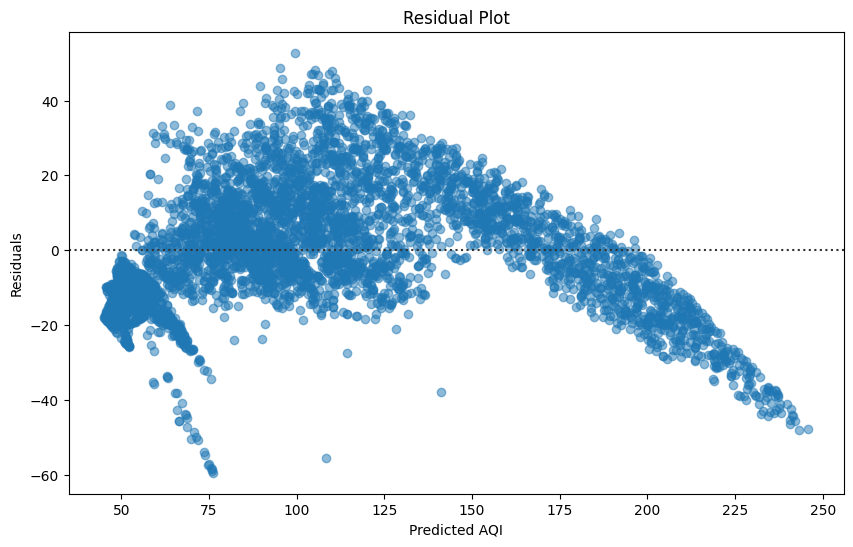

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# … after fitting your model …

# 1) Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         ls='--', color='red')
plt.title("Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.show()

# 2) Residual Plot with LOWESS smoothing
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred,
              y=residuals,
            #   lowess=True,              # Now works!
              scatter_kws={'alpha':0.5},
              line_kws={'color':'red'})
plt.title("Residual Plot")
plt.xlabel("Predicted AQI")
plt.ylabel("Residuals")
plt.show()


In [35]:
# # URL for public ThingSpeak channel (no API key needed)

# def prediction():
#     url = f'https://api.thingspeak.com/channels/2953164/feeds.csv'

#     df_3 = pd.read_csv(url)

#     # Rename the columns as requested
#     df_3.rename(columns={
#         'created_at': 'Date',
#         'field2': 'PM2.5',
#         'field3': 'PM10',
#         'field4': 'Temperature',
#         'field5': 'Humidity',
#         'field6': 'CO'
#     }, inplace=True)

#     # Convert the 'Date' column to datetime format, and keep only the date part
#     df_3['Date'] = pd.to_datetime(df_3['Date']).dt.date

#     # Drop 'entry_id' and 'field1' (if they exist), using mean for aggregation
#     df_3.drop(columns=['entry_id', 'field1'], errors='ignore', inplace=True)
#     df_processed = df_3.groupby('Date').mean()

#     # Reorder columns according to training data
#     df_processed_LR = df_processed[['PM2.5', 'PM10', 'CO', 'Temperature', 'Humidity']]
#     print("Current Data")
#     print(df_processed_LR.head())

#     print("#####PREDICTIONS#####")
#     # Predicted AQI
#     new_input = df_processed_LR.reset_index().drop(columns=['Date'])
#     new_prediction = linear_reg_model.predict(new_input)

#     # Classification of AQI
#     aqi_func_prediction = categorize_aqi(new_prediction[0])

#     return new_prediction, aqi_func_prediction, df_processed_LR

In [36]:
def prediction(linear_reg_model):
  import requests
  from io import StringIO

  # Replace with your channel details
  channel_id = "2953164"
  read_api_key = "VRUAK5AULEI6HMP"  # Optional for public channels

  # Get all feeds in CSV
  url = f"https://api.thingspeak.com/channels/{channel_id}/feeds.csv"
  params = {
      "api_key": read_api_key,
      "results": 8000  # max allowed
  }

  # Request data
  response = requests.get(url, params=params)

  # Parse CSV and filter desired fields
  if response.status_code == 200:
      df_real = pd.read_csv(StringIO(response.text))
      print(df_real['created_at'].min(), "to", df_real['created_at'].max())

      # print(df_selected.head())
      df_real.rename(columns={
          'created_at': 'Date',
          'field2': 'PM2.5',
          'field3': 'PM10',
          'field4': 'Temperature',
          'field5': 'Humidity',
          'field6': 'CO'
      }, inplace=True)

      # Convert the 'Date' column to datetime format, and keep only the date part
      df_real['Date'] = pd.to_datetime(df_real['Date']).dt.date

      # Drop 'entry_id' and 'field1' (if they exist), using mean for aggregation
      df_real.drop(columns=['entry_id', 'field1'], errors='ignore', inplace=True)
      df_processed = df_real.groupby('Date').mean().reset_index()

      # Reorder columns according to training data
      df_processed_LR = df_processed[['Date', 'PM2.5', 'PM10', 'CO', 'Temperature', 'Humidity']]
      print("Current Data")
      print(df_processed_LR.head())

      return df_processed_LR
  else:
      print("Error:", response.status_code, response.text)


In [37]:
#Add New Data to Model for retraining
def Air_Quality(df_processed_LR):

  print("2025 DATA:")
  # Predicted AQI
  # new_input = df_processed_LR.drop(columns=['Date'])
  # print(df_processed_LR)

  # Get the last row
  last_row = df_processed_LR.iloc[-1]

  # Extract individual values
  date = last_row['Date']
  pm25 = last_row['PM2.5']
  pm10 = last_row['PM10']
  co = last_row['CO']
  temp = last_row['Temperature']
  humidity = last_row['Humidity']

  # Print them
  print("Date:", date)
  print("PM2.5:", pm25)
  print("PM10:", pm10)
  print("CO:", co)
  print("Temperature:", temp)
  print("Humidity:", humidity)



  # Create a dictionary and add features
  data_dict = {
      "Date": last_row["Date"],
      "PM2.5": last_row["PM2.5"],
      "PM10": last_row["PM10"],
      "CO": last_row["CO"],
      "Temperature": last_row["Temperature"],
      "Humidity": last_row["Humidity"]
  }

  # Print to confirm
  return data_dict



df_processed_LR = prediction(linear_reg_model)
todays_data = Air_Quality(df_processed_LR)

2025-05-09 08:47:50 UTC to 2025-05-15 00:23:53 UTC
Current Data
         Date      PM2.5       PM10         CO  Temperature   Humidity
0  2025-05-09  35.927516  38.478536  12.415904    32.532583  52.068966
1  2025-05-10  43.823681  46.734747  17.538263    30.078594  54.298345
2  2025-05-11  20.313725  22.209150  14.382353    31.040523  52.003268
3  2025-05-12  10.776316  12.486842   5.925439    30.522807  50.833333
4  2025-05-13  31.709637  34.537194   7.698859    31.356509  52.437025
2025 DATA:
Date: 2025-05-15
PM2.5: 11.590909090909092
PM10: 14.181818181818182
CO: 5.25
Temperature: 32.66590909090909
Humidity: 44.27272727272727


In [38]:
#  import time
#  while True:
#      Air_Quality()
#      time.sleep(300)

In [39]:
# Cell: Save trained model to a .pkl file
import pickle

# 'linear_reg_model' is the variable returned by your training function
with open('linear_reg_model.pkl', 'wb') as f:
    pickle.dump(linear_reg_model, f)


print("✅ Trained model saved to linear_reg_model.pkl")


✅ Trained model saved to linear_reg_model.pkl


In [40]:
# # ── Debug Cell: inspect model + inputs ──
# import pickle
# from datetime import date

# # 1) Load model
# with open('linear_reg_model.pkl','rb') as f:
#     model = pickle.load(f)

# # 2) Reconstruct your raw “today” input
# #getting today's data
# df_processed_LR, new_prediction, aqi_func_prediction = prediction(linear_reg_model)
# today = date.today()

# # Filter the row for today
# df_today = df_processed_LR[df_processed_LR['Date'] == today]
# print(df_today.head())
# # today = {
# #     "PM2.5":      9.0,
# #     "PM10":       13.0,
# #     "CO":          6.0,
# #     "Temperature":30.6,
# #     "Humidity":   49.0
# # }
# # df_in = pd.DataFrame([today])

# # # 3) Align columns & normalize *exactly* as in training
# # #    (make sure you’ve run the cell that defines df_LR before this)
# # features = list(model.feature_names_in_)
# # # rebuild your norm_params from df_LR
# # norm = {col: {
# #            'mean': df_LR[col].mean(),
# #            'min':  df_LR[col].min(),
# #            'max':  df_LR[col].max()
# #        } for col in features}

# # df_norm = df_in.reindex(columns=features)
# # for col in features:
# #     p = norm[col]
# #     df_norm[col] = (df_norm[col] - p['mean']) / (p['max'] - p['min'])

# # # 4) Print intercept, coefs, normed inputs
# # print("Intercept:", model.intercept_)
# # print("Coefs:")
# # for n,c in zip(features, model.coef_):
# #     print(f"  {n}: {c:.4f}")
# # print("\nNormalized inputs:")
# # print(df_norm.to_dict(orient='records')[0])

# # 5) Manual dot‐product check
# # manual = model.intercept_ + (model.coef_ * df_norm.iloc[0]).sum()
# # print(f"\nManual pred: {manual:.3f}")

# # # 6) model.predict for sanity
# # print("model.predict:", model.predict(df_norm)[0])


In [41]:
# # ── Cell: Invert ML prediction back to real AQI ──

# # 1) Grab the normalized prediction you already computed:
# pred_norm = model.predict(df_norm)[0]
# print(f"🔢 raw normalized output: {pred_norm:.3f}")

# # 2) Recompute y-scale from your training target
# #    (df_LR is the DataFrame you used when training, which contains the true AQI)
# y = df_LR['AQI']
# y_min, y_max, y_mean = y.min(), y.max(), y.mean()
# print(f"   ➔ y_min={y_min:.1f}, y_max={y_max:.1f}, y_mean={y_mean:.1f}")

# # 3) Invert the normalization
# pred_aqi = pred_norm*(y_max - y_min) + y_mean
# print(f"✅ Predicted AQI (un-scaled): {pred_aqi:.1f}")


# Regression linear for app

In [42]:
# standard data science stack
import pandas as pd
import numpy as np

# model & evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# for saving
import pickle


In [43]:
# replace path if needed
df = pd.read_csv('global_air_quality_data_10000.csv')

# keep only the five fields your sensor provides
df = df[['PM2.5','PM10','CO','Temperature','Humidity']].copy()

# quick check
print(df.shape)
print(df.isna().sum())
df.head()


(10000, 5)
PM2.5          0
PM10           0
CO             0
Temperature    0
Humidity       0
dtype: int64


,PM2.5,PM10,CO,Temperature,Humidity
0,86.57,25.19,4.46,17.67,59.35
1,50.63,97.39,3.40,3.46,67.51
2,130.21,57.22,0.12,25.29,29.30
3,119.70,130.52,7.74,23.15,99.97
4,55.20,36.62,2.00,16.02,90.28


In [44]:
def calc_aqi_us(conc, pollutant):
    # breakpoints per EPA spec
    if pollutant == 'PM2.5':
        c_lo = [0,    12.1,  35.5,  55.5, 150.5, 250.5, 350.5, 500.5]
        c_hi = [12,   35.4,  55.4, 150.4, 250.4, 350.4, 500.4,1000.0]
        i_lo = [0,    51,   101,   151,   201,   301,   401,   501]
        i_hi = [50,  100,   150,   200,   300,   400,   500,   9999]
    elif pollutant == 'PM10':
        c_lo = [0,    55,   155,   255,   355,   425,   505,   605]
        c_hi = [54,  154,   254,   354,   424,   504,   604,   999.0]
        i_lo = [0,    51,   101,   151,   201,   301,   401,   501]
        i_hi = [50,  100,   150,   200,   300,   400,   500,   9999]
    elif pollutant == 'CO':
        c_lo = [0,    4.5,   9.5,  12.5,  15.5,  30.5,  40.5]
        c_hi = [4.4,  9.4,  12.4,  15.4,  30.4,  40.4,  50.4]
        i_lo = [0,    51,   101,   151,   201,   301,   401]
        i_hi = [50,  100,   150,   200,   300,   400,   500]
    else:
        return np.nan

    c = float(conc)
    for lo, hi, ilo, ihi in zip(c_lo, c_hi, i_lo, i_hi):
        if lo <= c <= hi:
            return round(((ihi-ilo)/(hi-lo))*(c-lo) + ilo, 1)
    # if above highest breakpoint:
    return round(((i_hi[-1]-i_lo[-1])/(c_hi[-1]-c_lo[-1]))*(c-c_lo[-1]) + i_lo[-1], 1)

# build AQI for each pollutant
df['aqi_pm25'] = df['PM2.5'].apply(lambda x: calc_aqi_us(x,'PM2.5'))
df['aqi_pm10'] = df['PM10'].apply(lambda x: calc_aqi_us(x,'PM10'))
df['aqi_co']   = df['CO'].apply(     lambda x: calc_aqi_us(x,'CO'))

# overall EPA AQI = max of the three
df['AQI'] = df[['aqi_pm25','aqi_pm10','aqi_co']].max(axis=1)

# drop any rows where we couldn't compute AQI
df.dropna(subset=['AQI'], inplace=True)

print("Final training set size:", df.shape)


Final training set size: (10000, 9)


In [45]:
# features + target
FEATURES = ['PM2.5','PM10','Temperature','Humidity','CO']
X = df[FEATURES]
y = df['AQI']

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# compute per‐feature normalization params
norm_params = {}
for col in FEATURES:
    norm_params[col] = {
      'mean': X_train[col].mean(),
      'min':  X_train[col].min(),
      'max':  X_train[col].max()
    }
    # apply: (x - mean) / (max - min)
    X_train[col] = (X_train[col] - norm_params[col]['mean']) \
                   / (norm_params[col]['max'] - norm_params[col]['min'])
    X_test[col]  = (X_test[col]  - norm_params[col]['mean']) \
                   / (norm_params[col]['max'] - norm_params[col]['min'])


In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [47]:
y_pred = lr.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²:  {r2_score(y_test, y_pred):.3f}")


MSE: 155.67
R²:  0.894


In [48]:
with open('linear_reg_model_mob.pkl', 'wb') as f:
    pickle.dump({
      'model':        lr,
      'norm_params':  norm_params,
      'features':     FEATURES
    }, f)


In [49]:
with open('linear_reg_model_mob.pkl','rb') as f:
    obj = pickle.load(f)

def categorize_aqi(aqi):
    if pd.isna(aqi): return 'Unknown'
    aqi = max(0.0, aqi)
    if aqi <= 50:   return 'Good'
    if aqi <= 100:  return 'Moderate'
    if aqi <= 150:  return 'Unhealthy for Sensitive Groups'
    if aqi <= 200:  return 'Unhealthy'
    if aqi <= 300:  return 'Very Unhealthy'
    return 'Hazardous'

def ml_predict(record, obj):
    # record: dict with keys in obj['features']
    df0 = pd.DataFrame([record])[obj['features']]
    # normalize
    for col, p in obj['norm_params'].items():
        df0[col] = (df0[col] - p['mean']) / (p['max'] - p['min'])
    raw = obj['model'].predict(df0)[0]
    aqi = round(max(0.0, raw),1)
    return aqi, categorize_aqi(aqi)

# example
sample = {
  'PM2.5':   15.0,
  'PM10':    30.0,
  'CO':      0.5,
  'Temperature': 25.0,
  'Humidity':    60.0
}
print( ml_predict(sample, obj) )


(90.3, 'Moderate')


In [50]:
# ─── Cell 1: fetch one day of ThingSpeak data ───────────────────────────────────
import requests
import pandas as pd
from datetime import datetime, timedelta

# pull last 2000 entries, then filter to past 24 h
raw = requests.get(
    "https://api.thingspeak.com/channels/2953164/feeds.json?results=2620"
).json().get('feeds', [])

df_day = (
    pd.DataFrame(raw)[['created_at','field2','field3','field4','field5','field6']]
      .rename(columns={
         'created_at':'timestamp',
         'field2':'PM2.5','field3':'PM10',
         'field4':'Temperature','field5':'Humidity','field6':'CO'
      })
)
df_day['timestamp'] = pd.to_datetime(df_day['timestamp'])
df_day = df_day[df_day['timestamp'] >= pd.Timestamp.utcnow() - pd.Timedelta(days=1)]
for col in ['PM2.5','PM10','Temperature','Humidity','CO']:
    df_day[col] = df_day[col].astype(float)

df_day.head()


,timestamp,PM2.5,PM10,Temperature,Humidity,CO
919,2025-05-14 00:24:38+00:00,7.0,8.0,30.2,46.0,7.0
920,2025-05-14 00:25:11+00:00,7.0,8.0,30.1,46.0,7.0
921,2025-05-14 00:25:46+00:00,7.0,8.0,30.2,47.0,6.0
922,2025-05-14 00:26:19+00:00,8.0,8.0,30.3,47.0,7.0
923,2025-05-14 00:26:52+00:00,8.0,8.0,30.3,47.0,7.0


In [51]:
# ─── Cell 2: compute EPA AQI + EPA category ──────────────────────────────────
def calc_aqi_us(conc, pollutant):
    if pollutant == 'PM2.5':
        c_lo, c_hi = [0,12.1,35.5,55.5,150.5,250.5,350.5,500.5], [12,35.4,55.4,150.4,250.4,350.4,500.4,1000]
        i_lo, i_hi = [0,51,101,151,201,301,401,501], [50,100,150,200,300,400,500,9999]
    elif pollutant == 'PM10':
        c_lo, c_hi = [0,55,155,255,355,425,505,605], [54,154,254,354,424,504,604,999]
        i_lo, i_hi = [0,51,101,151,201,301,401,501], [50,100,150,200,300,400,500,9999]
    elif pollutant == 'CO':
        c_lo, c_hi = [0,4.5,9.5,12.5,15.5,30.5,40.5], [4.4,9.4,12.4,15.4,30.4,40.4,50.4]
        i_lo, i_hi = [0,51,101,151,201,301,401], [50,100,150,200,300,400,500]
    else:
        return pd.NA

    c = float(conc)
    for lo, hi, ilo, ihi in zip(c_lo, c_hi, i_lo, i_hi):
        if lo <= c <= hi:
            return round(((ihi-ilo)/(hi-lo))*(c-lo) + ilo,1)
    return round(((i_hi[-1]-i_lo[-1])/(c_hi[-1]-c_lo[-1]))*(c-c_lo[-1])+i_lo[-1],1)

def categorize_aqi(aqi):
    if pd.isna(aqi): return 'Unknown'
    aqi = max(0.0, aqi)
    if aqi <= 50:   return 'Good'
    elif aqi <= 100: return 'Moderate'
    elif aqi <= 150: return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200: return 'Unhealthy'
    elif aqi <= 300: return 'Very Unhealthy'
    else:           return 'Hazardous'

# compute per‐pollutant AQI
df_day['epa_pm25'] = df_day['PM2.5'].apply(lambda x: calc_aqi_us(x,'PM2.5'))
df_day['epa_pm10'] = df_day['PM10'].apply(lambda x: calc_aqi_us(x,'PM10'))
df_day['epa_co']   = df_day['CO'].apply(lambda x:    calc_aqi_us(x,'CO'))

# overall EPA AQI + category
df_day['epa_aqi']      = df_day[['epa_pm25','epa_pm10','epa_co']].max(axis=1)
df_day['epa_category'] = df_day['epa_aqi'].apply(categorize_aqi)

df_day.head()


,timestamp,PM2.5,PM10,Temperature,Humidity,CO,epa_pm25,epa_pm10,epa_co,epa_aqi,epa_category
919,2025-05-14 00:24:38+00:00,7.0,8.0,30.2,46.0,7.0,29.2,7.4,76.0,76.0,Moderate
920,2025-05-14 00:25:11+00:00,7.0,8.0,30.1,46.0,7.0,29.2,7.4,76.0,76.0,Moderate
921,2025-05-14 00:25:46+00:00,7.0,8.0,30.2,47.0,6.0,29.2,7.4,66.0,66.0,Moderate
922,2025-05-14 00:26:19+00:00,8.0,8.0,30.3,47.0,7.0,33.3,7.4,76.0,76.0,Moderate
923,2025-05-14 00:26:52+00:00,8.0,8.0,30.3,47.0,7.0,33.3,7.4,76.0,76.0,Moderate


In [52]:
# ─── Cell 3: load your LR model + predict ML AQI + category ────────────────
import pickle

# load the dict you saved
with open('linear_reg_model_mob.pkl','rb') as f:
    obj = pickle.load(f)

FEATURES    = obj['features']
NORM_PARAMS = obj['norm_params']
LR_MODEL    = obj['model']

def ml_predict_row(row):
    X = pd.DataFrame([row[FEATURES]])
    for c,p in NORM_PARAMS.items():
        X[c] = (X[c] - p['mean'])/(p['max']-p['min'])
    raw = LR_MODEL.predict(X)[0]
    aqi = round(max(0.0, raw),1)
    return pd.Series({'ml_aqi': aqi, 'ml_category': categorize_aqi(aqi)})

df_day = pd.concat([df_day, df_day.apply(ml_predict_row, axis=1)], axis=1)
df_day.head()


,timestamp,PM2.5,PM10,Temperature,Humidity,CO,epa_pm25,epa_pm10,epa_co,epa_aqi,epa_category,ml_aqi,ml_category
919,2025-05-14 00:24:38+00:00,7.0,8.0,30.2,46.0,7.0,29.2,7.4,76.0,76.0,Moderate,84.4,Moderate
920,2025-05-14 00:25:11+00:00,7.0,8.0,30.1,46.0,7.0,29.2,7.4,76.0,76.0,Moderate,84.4,Moderate
921,2025-05-14 00:25:46+00:00,7.0,8.0,30.2,47.0,6.0,29.2,7.4,66.0,66.0,Moderate,84.1,Moderate
922,2025-05-14 00:26:19+00:00,8.0,8.0,30.3,47.0,7.0,33.3,7.4,76.0,76.0,Moderate,85.3,Moderate
923,2025-05-14 00:26:52+00:00,8.0,8.0,30.3,47.0,7.0,33.3,7.4,76.0,76.0,Moderate,85.3,Moderate


In [53]:
# ─── Cell 4: save processed one-day file to CSV ─────────────────────────────
out_path = 'thinkspeak_one_day_processed.csv'
df_day.to_csv(out_path, index=False)
print(f"Saved → {out_path}")


Saved → thinkspeak_one_day_processed.csv


In [54]:
# ─── Cell 5: classification accuracy + confusion matrix ────────────────────
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# drop any Unknown
mask = (df_day['epa_category']!='Unknown') & (df_day['ml_category']!='Unknown')
y_true = df_day.loc[mask,'epa_category']
y_pred = df_day.loc[mask,'ml_category']

acc = accuracy_score(y_true, y_pred)
cm  = confusion_matrix(y_true, y_pred, labels=sorted(y_true.unique()))

print(f"Classification Accuracy: {acc:.3f}\n")
print("Confusion Matrix:")
print(pd.DataFrame(cm, index=sorted(y_true.unique()), columns=sorted(y_true.unique())))
print("\nFull report:")
print(classification_report(y_true, y_pred))


Classification Accuracy: 0.686

Confusion Matrix:
                                Good  Hazardous  Moderate  Unhealthy  \
Good                               0          0         5          0   
Hazardous                          0         23         0          0   
Moderate                           0          0       946          0   
Unhealthy                          0          0        37         60   
Unhealthy for Sensitive Groups     0          0       256          0   
Very Unhealthy                     0          4         0          0   

                                Unhealthy for Sensitive Groups  Very Unhealthy  
Good                                                         0               0  
Hazardous                                                    0               0  
Moderate                                                   169               0  
Unhealthy                                                   46              17  
Unhealthy for Sensitive Groups          

# With SMOTE

In [55]:
# Cell 1: standard data science stack + SMOTE-for-regression
import pandas as pd
import numpy as np

# model & evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# SMOTE for regression
import smogn

# for saving
import pickle


In [56]:
# Cell 2: load CSV, define AQI funcs, compute EPA AQI + category
df = pd.read_csv('global_air_quality_data_10000.csv')
df = df[['PM2.5','PM10','CO','Temperature','Humidity']].copy()
# Cell 2: compute EPA AQI on your full df
def calc_aqi_us(conc, pollutant):
    # breakpoints per EPA spec
    if pollutant == 'PM2.5':
        c_lo = [0,    12.1,  35.5,  55.5, 150.5, 250.5, 350.5, 500.5]
        c_hi = [12,   35.4,  55.4, 150.4, 250.4, 350.4, 500.4,1000.0]
        i_lo = [0,    51,   101,   151,   201,   301,   401,   501]
        i_hi = [50,  100,   150,   200,   300,   400,   500,   9999]
    elif pollutant == 'PM10':
        c_lo = [0,    55,   155,   255,   355,   425,   505,   605]
        c_hi = [54,  154,   254,   354,   424,   504,   604,   999.0]
        i_lo = [0,    51,   101,   151,   201,   301,   401,   501]
        i_hi = [50,  100,   150,   200,   300,   400,   500,   9999]
    elif pollutant == 'CO':
        c_lo = [0,    4.5,   9.5,  12.5,  15.5,  30.5,  40.5]
        c_hi = [4.4,  9.4,  12.4,  15.4,  30.4,  40.4,  50.4]
        i_lo = [0,    51,   101,   151,   201,   301,   401]
        i_hi = [50,  100,   150,   200,   300,   400,   500]
    else:
        return np.nan

    c = float(conc)
    for lo, hi, ilo, ihi in zip(c_lo, c_hi, i_lo, i_hi):
        if lo <= c <= hi:
            return round(((ihi-ilo)/(hi-lo))*(c-lo) + ilo, 1)
    return round(((i_hi[-1]-i_lo[-1])/(c_hi[-1]-c_lo[-1]))*(c-c_lo[-1]) + i_lo[-1], 1)

# build AQI for each pollutant
df['aqi_pm25'] = df['PM2.5'].apply(lambda x: calc_aqi_us(x,'PM2.5'))
df['aqi_pm10'] = df['PM10'].apply(lambda x: calc_aqi_us(x,'PM10'))
df['aqi_co']   = df['CO'].apply(     lambda x: calc_aqi_us(x,'CO'))

# overall EPA AQI = max of the three
df['AQI'] = df[['aqi_pm25','aqi_pm10','aqi_co']].max(axis=1)

# drop any rows where we couldn't compute AQI
df.dropna(subset=['AQI'], inplace=True)

print("Final training set size:", df.shape)


Final training set size: (10000, 9)


In [57]:
# Cell 3: split → SMOTER → normalize (with index resets & zero-denom guard)

# 1) define features & target
FEATURES = ['PM2.5','PM10','Temperature','Humidity','CO']
X = df[FEATURES]
y = df['AQI']

# 2) train/test split (raw)
X_train_raw, X_test, y_train_raw, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) recombine & reset index so SMOTER has a clean dataframe
df_train = pd.concat([
    X_train_raw.reset_index(drop=True),
    y_train_raw.reset_index(drop=True).rename('AQI')
], axis=1)

# 4) apply SMOTE-for-regression
df_train_sm = smogn.smoter(data=df_train, y='AQI')

# 5) reset index again to ensure 0…N-1
df_train_sm = df_train_sm.reset_index(drop=True)

# 6) split back into X_train, y_train
X_train = df_train_sm[FEATURES].copy()
y_train = df_train_sm['AQI'].copy()

# 7) compute normalization params on the SMOTE’d training set
norm_params = {}
for col in FEATURES:
    mn = X_train[col].mean()
    lo = X_train[col].min()
    hi = X_train[col].max()
    norm_params[col] = {'mean': mn, 'min': lo, 'max': hi}

    denom = hi - lo
    if denom == 0:
        # all values equal → zero out
        X_train[col] = 0.0
        X_test[col]  = (X_test[col] - mn)  # center only
    else:
        X_train[col] = (X_train[col] - mn) / denom
        X_test[col]  = (X_test[col]  - mn) / denom

# now X_train, X_test, y_train, y_test are ready for fitting
print("Post-SMOTE training size:", X_train.shape)


r_index: 100%|##########| 967/967 [00:01<00:00, 777.87it/s]

Post-SMOTE training size: (6989, 5)


In [58]:
# Cell 4: fit LinearRegression on SMOTE’d + normalized data
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [59]:
# Cell 5: evaluate on untouched test set
y_pred = lr.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²:  {r2_score(y_test, y_pred):.3f}")


MSE: 241.54
R²:  0.835


In [60]:
# Cell 6: save the model + norm‐params + feature list
with open('linear_reg_model_mob_smote.pkl', 'wb') as f:
    pickle.dump({
      'model':        lr,
      'norm_params':  norm_params,
      'features':     FEATURES
    }, f)


In [61]:
# Cell 7: load & example inference
with open('linear_reg_model_mob_smote.pkl','rb') as f:
    obj = pickle.load(f)

def categorize_aqi(aqi):
    if pd.isna(aqi): return 'Unknown'
    aqi = max(0.0, aqi)
    if aqi <= 50:   return 'Good'
    if aqi <= 100:  return 'Moderate'
    if aqi <= 150:  return 'Unhealthy for Sensitive Groups'
    if aqi <= 200:  return 'Unhealthy'
    if aqi <= 300:  return 'Very Unhealthy'
    return 'Hazardous'

def ml_predict(record, obj):
    df0 = pd.DataFrame([record])[obj['features']]
    for col, p in obj['norm_params'].items():
        df0[col] = (df0[col] - p['mean']) / (p['max'] - p['min'])
    raw = obj['model'].predict(df0)[0]
    aqi = round(max(0.0, raw),1)
    return aqi, categorize_aqi(aqi)

# example
sample = {
  'PM2.5':   15.0,
  'PM10':    30.0,
  'CO':      0.5,
  'Temperature': 25.0,
  'Humidity':    60.0
}
print( ml_predict(sample, obj) )


(67.4, 'Moderate')


In [62]:
# Cell 8: fetch one day of ThingSpeak data
import requests
import pandas as pd
from datetime import datetime, timedelta

raw = requests.get(
    "https://api.thingspeak.com/channels/2953164/feeds.json?results=2620"
).json().get('feeds', [])

df_day = (
    pd.DataFrame(raw)[['created_at','field2','field3','field4','field5','field6']]
      .rename(columns={
         'created_at':'timestamp',
         'field2':'PM2.5','field3':'PM10',
         'field4':'Temperature','field5':'Humidity','field6':'CO'
      })
)
df_day['timestamp'] = pd.to_datetime(df_day['timestamp'])
df_day = df_day[df_day['timestamp'] >= pd.Timestamp.utcnow() - pd.Timedelta(days=1)]
for col in ['PM2.5','PM10','Temperature','Humidity','CO']:
    df_day[col] = df_day[col].astype(float)

df_day.head()


,timestamp,PM2.5,PM10,Temperature,Humidity,CO
919,2025-05-14 00:26:52+00:00,8.0,8.0,30.3,47.0,7.0
920,2025-05-14 00:27:25+00:00,8.0,8.0,30.4,46.0,6.0
921,2025-05-14 00:27:58+00:00,10.0,11.0,30.4,46.0,7.0
922,2025-05-14 00:28:31+00:00,10.0,11.0,30.4,47.0,7.0
923,2025-05-14 00:29:07+00:00,10.0,11.0,30.4,47.0,7.0


In [63]:
# Cell 9: compute EPA AQI + category on df_day
def calc_aqi_us(conc, pollutant):
    if pollutant == 'PM2.5':
        c_lo, c_hi = [0,12.1,35.5,55.5,150.5,250.5,350.5,500.5], [12,35.4,55.4,150.4,250.4,350.4,500.4,1000]
        i_lo, i_hi = [0,51,101,151,201,301,401,501], [50,100,150,200,300,400,500,9999]
    elif pollutant == 'PM10':
        c_lo, c_hi = [0,55,155,255,355,425,505,605], [54,154,254,354,424,504,604,999]
        i_lo, i_hi = [0,51,101,151,201,301,401,501], [50,100,150,200,300,400,500,9999]
    elif pollutant == 'CO':
        c_lo, c_hi = [0,4.5,9.5,12.5,15.5,30.5,40.5], [4.4,9.4,12.4,15.4,30.4,40.4,50.4]
        i_lo, i_hi = [0,51,101,151,201,301,401], [50,100,150,200,300,400,500]
    else:
        return pd.NA

    c = float(conc)
    for lo, hi, ilo, ihi in zip(c_lo, c_hi, i_lo, i_hi):
        if lo <= c <= hi:
            return round(((ihi-ilo)/(hi-lo))*(c-lo) + ilo,1)
    return round(((i_hi[-1]-i_lo[-1])/(c_hi[-1]-c_lo[-1]))*(c-c_lo[-1])+i_lo[-1],1)

def categorize_aqi(aqi):
    if pd.isna(aqi): return 'Unknown'
    aqi = max(0.0, aqi)
    if aqi <= 50:   return 'Good'
    elif aqi <= 100: return 'Moderate'
    elif aqi <= 150: return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200: return 'Unhealthy'
    elif aqi <= 300: return 'Very Unhealthy'
    else:           return 'Hazardous'

df_day['epa_pm25'] = df_day['PM2.5'].apply(lambda x: calc_aqi_us(x,'PM2.5'))
df_day['epa_pm10'] = df_day['PM10'].apply(lambda x: calc_aqi_us(x,'PM10'))
df_day['epa_co']   = df_day['CO'].apply(lambda x:    calc_aqi_us(x,'CO'))

df_day['epa_aqi']      = df_day[['epa_pm25','epa_pm10','epa_co']].max(axis=1)
df_day['epa_category'] = df_day['epa_aqi'].apply(categorize_aqi)

df_day.head()


,timestamp,PM2.5,PM10,Temperature,Humidity,CO,epa_pm25,epa_pm10,epa_co,epa_aqi,epa_category
919,2025-05-14 00:26:52+00:00,8.0,8.0,30.3,47.0,7.0,33.3,7.4,76.0,76.0,Moderate
920,2025-05-14 00:27:25+00:00,8.0,8.0,30.4,46.0,6.0,33.3,7.4,66.0,66.0,Moderate
921,2025-05-14 00:27:58+00:00,10.0,11.0,30.4,46.0,7.0,41.7,10.2,76.0,76.0,Moderate
922,2025-05-14 00:28:31+00:00,10.0,11.0,30.4,47.0,7.0,41.7,10.2,76.0,76.0,Moderate
923,2025-05-14 00:29:07+00:00,10.0,11.0,30.4,47.0,7.0,41.7,10.2,76.0,76.0,Moderate


In [64]:
# Cell 10: load LR model + predict ML AQI + category
with open('linear_reg_model_mob_smote.pkl','rb') as f:
    obj = pickle.load(f)

FEATURES    = obj['features']
NORM_PARAMS = obj['norm_params']
LR_MODEL    = obj['model']

def ml_predict_row(row):
    X = pd.DataFrame([row[FEATURES]])
    for c,p in NORM_PARAMS.items():
        X[c] = (X[c] - p['mean'])/(p['max']-p['min'])
    raw = LR_MODEL.predict(X)[0]
    aqi = round(max(0.0, raw),1)
    return pd.Series({'ml_aqi': aqi, 'ml_category': categorize_aqi(aqi)})

df_day = pd.concat([df_day, df_day.apply(ml_predict_row, axis=1)], axis=1)
df_day.head()


,timestamp,PM2.5,PM10,Temperature,Humidity,CO,epa_pm25,epa_pm10,epa_co,epa_aqi,epa_category,ml_aqi,ml_category
919,2025-05-14 00:26:52+00:00,8.0,8.0,30.3,47.0,7.0,33.3,7.4,76.0,76.0,Moderate,65.5,Moderate
920,2025-05-14 00:27:25+00:00,8.0,8.0,30.4,46.0,6.0,33.3,7.4,66.0,66.0,Moderate,64.3,Moderate
921,2025-05-14 00:27:58+00:00,10.0,11.0,30.4,46.0,7.0,41.7,10.2,76.0,76.0,Moderate,67.9,Moderate
922,2025-05-14 00:28:31+00:00,10.0,11.0,30.4,47.0,7.0,41.7,10.2,76.0,76.0,Moderate,67.9,Moderate
923,2025-05-14 00:29:07+00:00,10.0,11.0,30.4,47.0,7.0,41.7,10.2,76.0,76.0,Moderate,67.9,Moderate


In [65]:
# Cell 11: save processed one-day file to CSV
out_path = 'thinkspeak_one_day_processed_smote.csv'
df_day.to_csv(out_path, index=False)
print(f"Saved → {out_path}")


Saved → thinkspeak_one_day_processed_smote.csv


In [66]:
# Cell 12: classification accuracy + confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

mask = (df_day['epa_category']!='Unknown') & (df_day['ml_category']!='Unknown')
y_true = df_day.loc[mask,'epa_category']
y_pred = df_day.loc[mask,'ml_category']

acc = accuracy_score(y_true, y_pred)
cm  = confusion_matrix(y_true, y_pred, labels=sorted(y_true.unique()))

print(f"Classification Accuracy: {acc:.3f}\n")
print("Confusion Matrix:")
print(pd.DataFrame(cm, index=sorted(y_true.unique()), columns=sorted(y_true.unique())))
print("\nFull report:")
print(classification_report(y_true, y_pred))


Classification Accuracy: 0.745

Confusion Matrix:
                                Good  Hazardous  Moderate  Unhealthy  \
Good                               0          0         5          0   
Hazardous                          0         23         0          0   
Moderate                           0          0      1115          0   
Unhealthy                          0          0        45         46   
Unhealthy for Sensitive Groups     0          0       298          0   
Very Unhealthy                     0         16         0          0   

                                Unhealthy for Sensitive Groups  Very Unhealthy  
Good                                                         0               0  
Hazardous                                                    0               0  
Moderate                                                     0               0  
Unhealthy                                                   41              28  
Unhealthy for Sensitive Groups          

## Randomforest 

In [67]:
# Cell 3: split → SMOTE → normalize (ensure X_train & y_train align)

from sklearn.model_selection import train_test_split
import smogn

FEATURES = ['PM2.5','PM10','Temperature','Humidity','CO']
X = df[FEATURES]
y = df['AQI']

# 1) raw train/test split
X_train_raw, X_test_raw, y_train_raw, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) recombine & reset indices
df_train = pd.concat([
    X_train_raw.reset_index(drop=True),
    y_train_raw.reset_index(drop=True).rename('AQI')
], axis=1)

# 3) SMOTE-for-regression
df_train_sm = smogn.smoter(data=df_train, y='AQI').reset_index(drop=True)

# 4) extract SMOTE’d X_train & y_train
X_train_sm = df_train_sm[FEATURES].copy()
y_train_sm = df_train_sm['AQI'].copy()

# 5) normalization parameters from SMOTE’d set
norm_params = {}
for col in FEATURES:
    mn, lo, hi = X_train_sm[col].mean(), X_train_sm[col].min(), X_train_sm[col].max()
    norm_params[col] = {'mean': mn, 'min': lo, 'max': hi}

    denom = hi - lo
    if denom == 0:
        X_train_sm[col] = 0.0
    else:
        X_train_sm[col] = (X_train_sm[col] - mn) / denom

# 6) normalize the raw X_test using the *same* params
X_test = X_test_raw.copy()
for col, p in norm_params.items():
    denom = p['max'] - p['min']
    if denom == 0:
        X_test[col] = (X_test[col] - p['mean'])
    else:
        X_test[col] = (X_test[col] - p['mean']) / denom

# finally, rename for fitting
X_train = X_train_sm
y_train = y_train_sm

print("✅ Shapes aligned:", X_train.shape, y_train.shape)
# e.g. (6989, 5) (6989,)


r_index: 100%|##########| 967/967 [00:00<00:00, 1015.86it/s]

✅ Shapes aligned: (6989, 5) (6989,)


In [68]:
# Cell 4: train a RandomForestRegressor on the SMOTE’d + normalized data

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# now X_train & y_train have the same length
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [69]:
# Cell 5: evaluate
y_pred = rf.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²:  {r2_score(y_test, y_pred):.3f}")
print("Categorical accuracy:", accuracy_score(
    y_test.apply(categorize_aqi),
    pd.Series(y_pred).apply(categorize_aqi)
))


MSE: 6.62
R²:  0.995
Categorical accuracy: 0.9965


In [70]:
# Cell 6: save
with open('rf_regressor_model_mob.pkl', 'wb') as f:
    pickle.dump({
        'model':       rf,
        'norm_params': norm_params,
        'features':    FEATURES
    }, f)


In [71]:
# Cell 7: load & example inference for classification
import pickle, pandas as pd

with open('rf_regressor_model_mob.pkl', 'rb') as f:
    obj = pickle.load(f)

clf_loaded   = obj['model']
FEATURES     = obj['features']

# example record must have exactly those FEATURES
sample = {
  'PM2.5':   15.0,
  'PM10':    30.0,
  'CO':      0.5,
  'Temperature': 25.0,
  'Humidity':    60.0
}
df0 = pd.DataFrame([sample])[FEATURES]
pred_category = clf_loaded.predict(df0)[0]
print("Predicted AQI category:", pred_category)


Predicted AQI category: 199.68475622294355


In [72]:
# Cell X: fetch one day of ThingSpeak data, score with RF model, and save to CSV

import requests
import pandas as pd
from datetime import datetime, timedelta
import pickle
import numpy as np

# ─── Load RF regressor ────────────────────────────────────────────────────────
with open('rf_regressor_model_mob.pkl', 'rb') as f:
    rf_obj       = pickle.load(f)
FEATURES      = rf_obj['features']
NORM_PARAMS   = rf_obj['norm_params']
RF_MODEL      = rf_obj['model']

# ─── EPA AQI helpers ─────────────────────────────────────────────────────────
def calc_aqi_us(conc, pollutant):
    if pollutant == 'PM2.5':
        c_lo = [0,12.1,35.5,55.5,150.5,250.5,350.5,500.5]
        c_hi = [12,35.4,55.4,150.4,250.4,350.4,500.4,1000.0]
        i_lo = [0,51,101,151,201,301,401,501]
        i_hi = [50,100,150,200,300,400,500,9999]
    elif pollutant == 'PM10':
        c_lo = [0,55,155,255,355,425,505,605]
        c_hi = [54,154,254,354,424,504,604,999.0]
        i_lo = [0,51,101,151,201,301,401,501]
        i_hi = [50,100,150,200,300,400,500,9999]
    elif pollutant == 'CO':
        c_lo = [0,4.5,9.5,12.5,15.5,30.5,40.5]
        c_hi = [4.4,9.4,12.4,15.4,30.4,40.4,50.4]
        i_lo = [0,51,101,151,201,301,401]
        i_hi = [50,100,150,200,300,400,500]
    else:
        return np.nan

    c = float(conc)
    for lo, hi, ilo, ihi in zip(c_lo, c_hi, i_lo, i_hi):
        if lo <= c <= hi:
            return round(((ihi-ilo)/(hi-lo))*(c-lo) + ilo, 1)
    return round(((i_hi[-1]-i_lo[-1])/(c_hi[-1]-c_lo[-1]))*(c-c_lo[-1]) + i_lo[-1], 1)

def categorize_aqi(aqi):
    if pd.isna(aqi): 
        return 'Unknown'
    aqi = max(0.0, aqi)
    if aqi <= 50:   return 'Good'
    if aqi <= 100:  return 'Moderate'
    if aqi <= 150:  return 'Unhealthy for Sensitive Groups'
    if aqi <= 200:  return 'Unhealthy'
    if aqi <= 300:  return 'Very Unhealthy'
    return 'Hazardous'

def ml_predict_row(row):
    # normalize
    X = row[FEATURES].to_frame().T.copy()
    for c, p in NORM_PARAMS.items():
        X[c] = (X[c] - p['mean']) / (p['max'] - p['min'])
    pred = RF_MODEL.predict(X)[0]
    aqi = round(max(0.0, pred), 1)
    return pd.Series({'ml_aqi': aqi, 'ml_category': categorize_aqi(aqi)})

# ─── Fetch last 2000 entries, filter to 24h ─────────────────────────────────
resp = requests.get("https://api.thingspeak.com/channels/2953164/feeds.json?results=2000")
feeds = resp.json().get('feeds', [])

df_day = (
    pd.DataFrame(feeds)[['created_at','field2','field3','field4','field5','field6']]
      .rename(columns={
         'created_at':'timestamp',
         'field2':'PM2.5',
         'field3':'PM10',
         'field4':'Temperature',
         'field5':'Humidity',
         'field6':'CO'
      })
)

# parse types & filter last 24h
df_day['timestamp']   = pd.to_datetime(df_day['timestamp'])
df_day = df_day[df_day['timestamp'] >= pd.Timestamp.utcnow() - pd.Timedelta(days=1)]
for col in ['PM2.5','PM10','Temperature','Humidity','CO']:
    df_day[col] = df_day[col].astype(float)

# ─── Compute EPA AQI + category ──────────────────────────────────────────────
df_day['epa_aqi']      = df_day.apply(lambda r: max(
    calc_aqi_us(r['PM2.5'],'PM2.5'),
    calc_aqi_us(r['PM10'],'PM10'),
    calc_aqi_us(r['CO'],'CO')
), axis=1)
df_day['epa_category'] = df_day['epa_aqi'].apply(categorize_aqi)

# ─── Compute ML AQI + category ──────────────────────────────────────────────
df_ml = df_day.apply(ml_predict_row, axis=1)
df_day = pd.concat([df_day, df_ml], axis=1)

# ─── Save to CSV ────────────────────────────────────────────────────────────
out_path = 'thinkspeak_data_one_day_rf.csv'
df_day.to_csv(out_path, index=False)
print(f"Saved → {out_path}")


Saved → thinkspeak_data_one_day_rf.csv


Classification Accuracy: 0.933


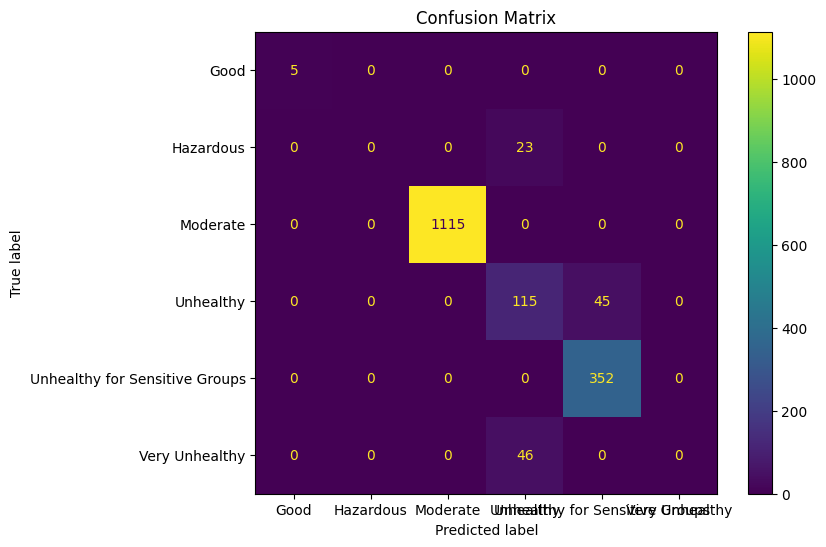

In [73]:
# Cell X: Classification Accuracy and Confusion Matrix Visualization
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Ensure df_day is defined and contains columns 'epa_category' and 'ml_category'
# Filter out Unknown categories
mask = (df_day['epa_category'] != 'Unknown') & (df_day['ml_category'] != 'Unknown')
y_true = df_day.loc[mask, 'epa_category']
y_pred = df_day.loc[mask, 'ml_category']

# Compute accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Classification Accuracy: {acc:.3f}")

# Compute confusion matrix
labels = sorted(y_true.unique())
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
ax.set_title("Confusion Matrix")
plt.show()


Classification Accuracy on test set: 0.997

Classification Report:
                                precision    recall  f1-score   support

                          Good       1.00      0.88      0.93         8
                      Moderate       0.99      1.00      0.99       298
                     Unhealthy       1.00      1.00      1.00      1314
Unhealthy for Sensitive Groups       0.99      0.99      0.99       380

                      accuracy                           1.00      2000
                     macro avg       0.99      0.97      0.98      2000
                  weighted avg       1.00      1.00      1.00      2000



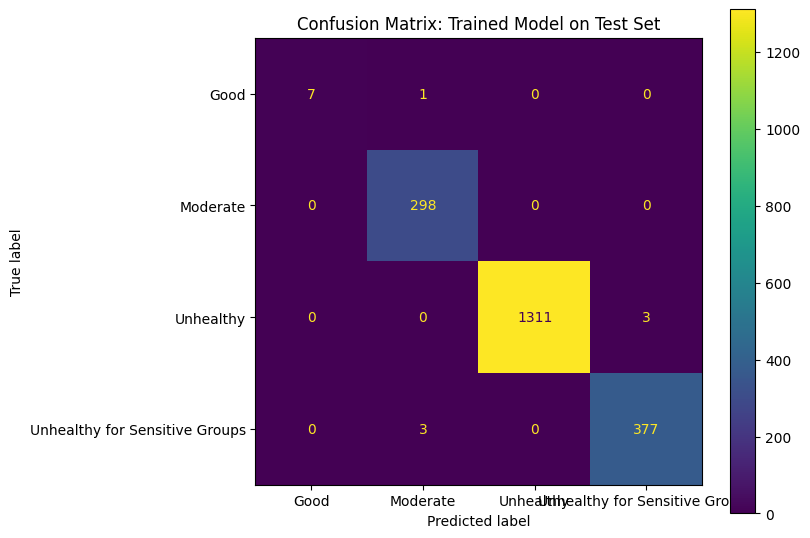

In [74]:
# Cell Y: Training Set Classification Evaluation and Report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming X_test, y_test, and rf (RandomForestRegressor) are in scope, and categorize_aqi is defined
# Convert true AQI to categories
y_true_cat = y_test.apply(categorize_aqi)

# Predict numeric AQI on test set and convert to categories
y_pred_num = rf.predict(X_test)
y_pred_cat = pd.Series(y_pred_num).apply(categorize_aqi)

# Compute accuracy
acc = accuracy_score(y_true_cat, y_pred_cat)
print(f"Classification Accuracy on test set: {acc:.3f}\n")

# Classification report
print("Classification Report:")
print(classification_report(y_true_cat, y_pred_cat))

# Confusion matrix
labels = sorted(y_true_cat.unique())
cm = confusion_matrix(y_true_cat, y_pred_cat, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
ax.set_title("Confusion Matrix: Trained Model on Test Set")
plt.tight_layout()
plt.show()
